Examine "glitches" in read out

In [1]:
import importlib
from mkids import TopSoc
import numpy as np
import matplotlib.pyplot as plt
import Scan
from tqdm.notebook import trange, tqdm

soc = TopSoc()

In [2]:
scan = Scan.Scan(soc)
fMixer = soc.fsIn/2/2
scan.soc.set_mixer(fMixer)

1024.0

In [3]:
f0 = fMixer + 1.4
outCh = scan.soc.outFreq2ch(f0)
fCenter = scan.soc.outCh2FreqCenter(outCh)
print(fCenter)
fStart = fCenter-soc.fcOut/2
fEnd = fCenter+soc.fcOut/2
print(fStart,fEnd)


1026.0
1025.0 1027.0


In [21]:
# Do one frequency scan
freqs = np.array([fCenter, fCenter+1*soc.fcOut, fCenter+2*soc.fcOut])#, fCenter+3*soc.fcOut])
nTones = 10
freqs = []
for i in range(nTones):
    freqs.append(fCenter+i*soc.fcOut)
freqs = np.array(freqs)
amps = 0.9*np.ones(len(freqs))/len(freqs)
fis = 1+(0.1*np.arange(len(freqs)))
nf = 101
bandwidth = soc.fcIn*(1-1/nf)
decimation = 2
nt = 1
truncate = 500
fscan = scan.fscan(freqs, amps, fis, bandwidth, nf, decimation, nt, truncate, 
                   doProgress=True, retainXBuf = True)


  0%|          | 0/101 [00:00<?, ?it/s]

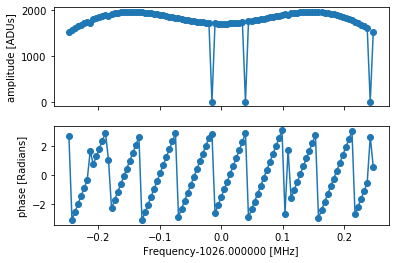

In [23]:
# Look at amplitude and phase vs frequency for a specific tone where 0 <= iTone < nTone
iTone = 0
Scan.fscanPlot(fscan, iTone)

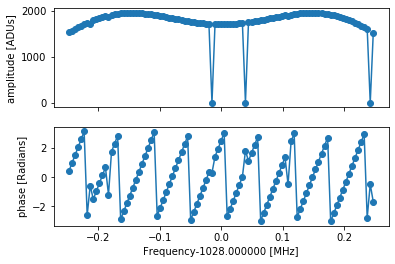

In [24]:
# See that "glitches" occur at the same value of df
iTone = 1
Scan.fscanPlot(fscan, iTone)

In [25]:
# The full buffer is retained.  Confirm is has the correct length
assert(len(scan.retainedXbuf)==nf)

In [30]:
# The value of i indexing the array of DF values.  Count points in the above plot to choose i.
# This is replotted later with your selected point highlighted in red to confirm which point you chose.
i = 7
xbuf = scan.retainedXbuf[i]
offset = scan.input_config['offset']
results = xbuf.mean(axis=1)
results += offset[:, np.newaxis]
results_complex = results.dot([1,1j])
amp = np.abs(results_complex)[iTone]
phiMeasured = np.angle(results_complex)[iTone]
phi = np.angle(np.exp(1j*(phiMeasured - fis[iTone])))
print(amp,phi)

1707.3720251090585 -0.578939142556947


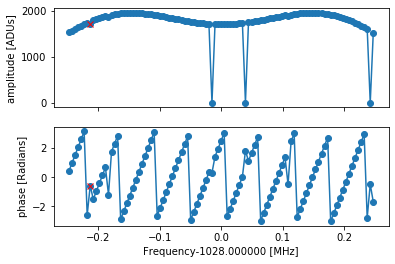

In [31]:
# Recalculate the (averaged) amp,phi value and overplot to confirm you have the correct point
dfs = fscan["dfs"]
xs = fscan['xs'][:,iTone]
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(dfs, np.abs(xs), '-o')
ax[0].set_ylabel("amplitude [ADUs]")
ax[1].plot(dfs, np.angle(xs), '-o')
ax[1].set_ylabel("phase [Radians]")
ax[1].set_xlabel("Frequency-%f [MHz]"%fscan["freqs"][iTone])
df = dfs[i]
ax[0].plot(df, amp, 'rx')
ax[1].plot(df, phi, 'rx')


Text(0.5, 0, 'sample number after truncation')

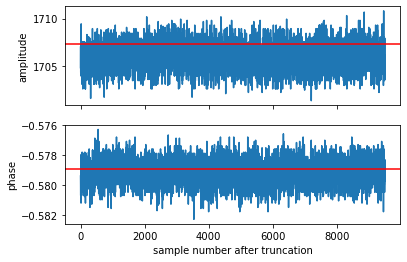

In [33]:
xs = xbuf[iTone].dot([1,1j])
amps = np.abs(xs)
phisMeasured = np.angle(xs)
phis = np.angle(np.exp(1j*(phisMeasured - fis[iTone])))
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(amps)
ax[0].axhline(amp, color='r')
ax[1].plot(phis)
ax[1].axhline(phi, color='r')
ax[0].set_ylabel("amplitude")
ax[1].set_ylabel("phase")
ax[1].set_xlabel("sample number after truncation")

Text(0.5, 0, 'sample number after truncation')

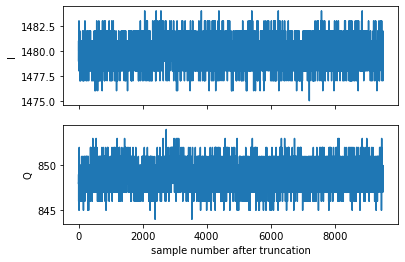

In [34]:
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(np.real(xs))
ax[1].plot(np.imag(xs))
ax[0].set_ylabel("I")
ax[1].set_ylabel("Q")
ax[1].set_xlabel("sample number after truncation")